In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils_modeling import *
import seaborn as sns

Locations of BCs and their synapses

In [2]:
BC_locations = np.load('Synapses/BC_locations_OFF.npy', allow_pickle = True)
synapse_locations = np.load('Synapses/synapse_locations_OFF.npy', allow_pickle = True)
BC_types = np.load('Synapses/BC_types_OFF.npy', allow_pickle = True)

Resolution of data

In [3]:
spatial_conversion = np.load('BC Data/spatial_conversion_um2pixel.npy')[0] # From um to pixel
temporal_conversion = np.load('BC Data/temporal_conversion_sec2pixel.npy')[0] # From seconds to pixel

Load kernels

In [4]:
kernel_c12_t2 = np.load('BC Data/cluster_12_type_2.npy') # Original kernels
kernel_c1_t3b = np.load('BC Data/cluster_1_type_3b.npy')

kernel_c12_t2_0 = np.load('BC Data/cluster_12_type_2_enhanced_0.01.npy') # Kernels with weaker surround
kernel_c1_t3b_0 = np.load('BC Data/cluster_1_type_3b_enhanced_0.01.npy')

kernel_c12_t2_3 = np.load('BC Data/cluster_12_type_2_enhanced_3.npy') # Kernels with stronger surround
kernel_c1_t3b_3 = np.load('BC Data/cluster_1_type_3b_enhanced_3.npy')

In [5]:
BC_types

array(['1', '1', '1', '3a', '3a'], dtype='<U21')

In [6]:
right_extension = 0
left_extension = 0

# 3 type 1 cells
BC1_1 = get_BC_kernel(kernel_c12_t2, BC_locations[0], right_extension, left_extension, spatial_conversion)
BC1_2 = get_BC_kernel(kernel_c12_t2, BC_locations[1], right_extension, left_extension, spatial_conversion)
BC1_3 = get_BC_kernel(kernel_c12_t2, BC_locations[2], right_extension, left_extension, spatial_conversion)

# 2 type 3a cells
BC3a_1 = get_BC_kernel(kernel_c1_t3b, BC_locations[3], right_extension, left_extension, spatial_conversion)
BC3a_2 = get_BC_kernel(kernel_c1_t3b, BC_locations[4], right_extension, left_extension, spatial_conversion)

kernels = [BC1_1, BC1_2, BC1_3, BC3a_1, BC3a_2]

In [7]:
right_extension = 0
left_extension = 0

# 3 type 1 cells
BC1_1 = get_BC_kernel(kernel_c12_t2_0, BC_locations[0], right_extension, left_extension, spatial_conversion)
BC1_2 = get_BC_kernel(kernel_c12_t2_0, BC_locations[1], right_extension, left_extension, spatial_conversion)
BC1_3 = get_BC_kernel(kernel_c12_t2_0, BC_locations[2], right_extension, left_extension, spatial_conversion)

# 2 type 3a cells
BC3a_1 = get_BC_kernel(kernel_c1_t3b_0, BC_locations[3], right_extension, left_extension, spatial_conversion)
BC3a_2 = get_BC_kernel(kernel_c1_t3b_0, BC_locations[4], right_extension, left_extension, spatial_conversion)

kernels_0 = [BC1_1, BC1_2, BC1_3, BC3a_1, BC3a_2]

In [8]:
right_extension = 0
left_extension = 0

# 3 type 1 cells
BC1_1 = get_BC_kernel(kernel_c12_t2_3, BC_locations[0], right_extension, left_extension, spatial_conversion)
BC1_2 = get_BC_kernel(kernel_c12_t2_3, BC_locations[1], right_extension, left_extension, spatial_conversion)
BC1_3 = get_BC_kernel(kernel_c12_t2_3, BC_locations[2], right_extension, left_extension, spatial_conversion)

# 2 type 3a cells
BC3a_1 = get_BC_kernel(kernel_c1_t3b_3, BC_locations[3], right_extension, left_extension, spatial_conversion)
BC3a_2 = get_BC_kernel(kernel_c1_t3b_3, BC_locations[4], right_extension, left_extension, spatial_conversion)

kernels_3 = [BC1_1, BC1_2, BC1_3, BC3a_1, BC3a_2]

In [9]:
total_kernel = np.zeros_like(BC1_1)
for index, kernel in enumerate(kernels): 
    total_kernel = total_kernel + len(synapse_locations[index])*kernel
    
total_kernel_0 = np.zeros_like(BC1_1)
for index, kernel in enumerate(kernels_0): 
    total_kernel_0 = total_kernel_0 + len(synapse_locations[index])*kernel
  
total_kernel_3 = np.zeros_like(BC1_1)
for index, kernel in enumerate(kernels_3): 
    total_kernel_3 = total_kernel_3 + len(synapse_locations[index])*kernel

In [10]:
vmax_ = np.amax((np.amax(total_kernel), np.amax(total_kernel_0), np.amax(total_kernel_3)))
vmin_ = np.amin((np.amin(total_kernel), np.amin(total_kernel_0), np.amin(total_kernel_3)))

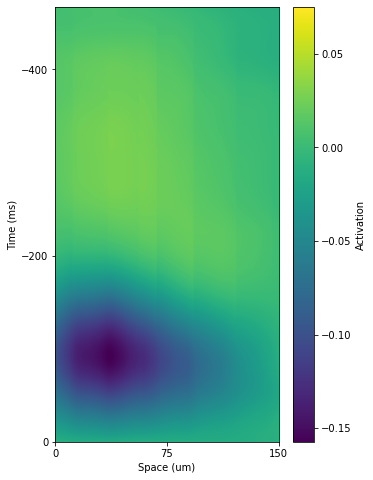

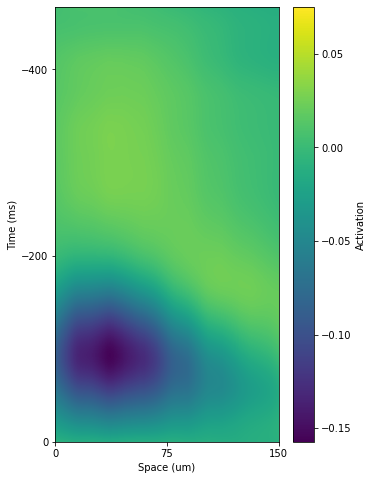

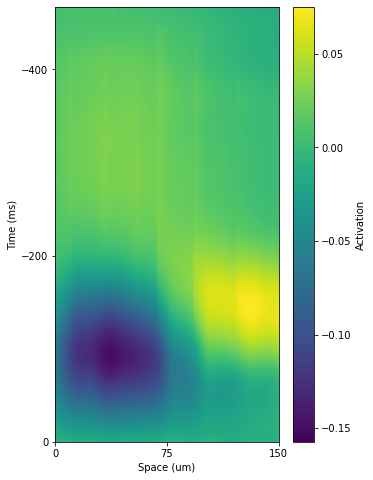

In [11]:
plt.figure(figsize=(5,8))
plt.imshow(total_kernel_0, aspect = 'auto', vmin = vmin_, vmax = vmax_,
           cmap = 'viridis', extent = [0, 150, 0, -467.2])
plt.colorbar(label = 'Activation')
plt.xlabel('Space (um)')
plt.ylabel('Time (ms)')
plt.xticks([0,75,150])
plt.yticks([-400,-200,0])
plt.show()


plt.figure(figsize=(5,8))
plt.imshow(total_kernel, aspect= 'auto', vmin = vmin_, vmax = vmax_, 
           cmap = 'viridis', extent = [0, 150, 0, -467.2])
plt.colorbar(label = 'Activation')
plt.xlabel('Space (um)')
plt.ylabel('Time (ms)')
plt.xticks([0,75,150])
plt.yticks([-400,-200,0])
plt.show()


plt.figure(figsize=(5,8))
plt.imshow(total_kernel_3, aspect= 'auto', vmin = vmin_, vmax = vmax_,
           cmap = 'viridis', extent = [0, 150, 0, -467.2])
plt.colorbar(label = 'Activation')
plt.xlabel('Space (um)')
plt.ylabel('Time (ms)')
plt.xticks([0,75,150])
plt.yticks([-400,-200,0])
plt.show()